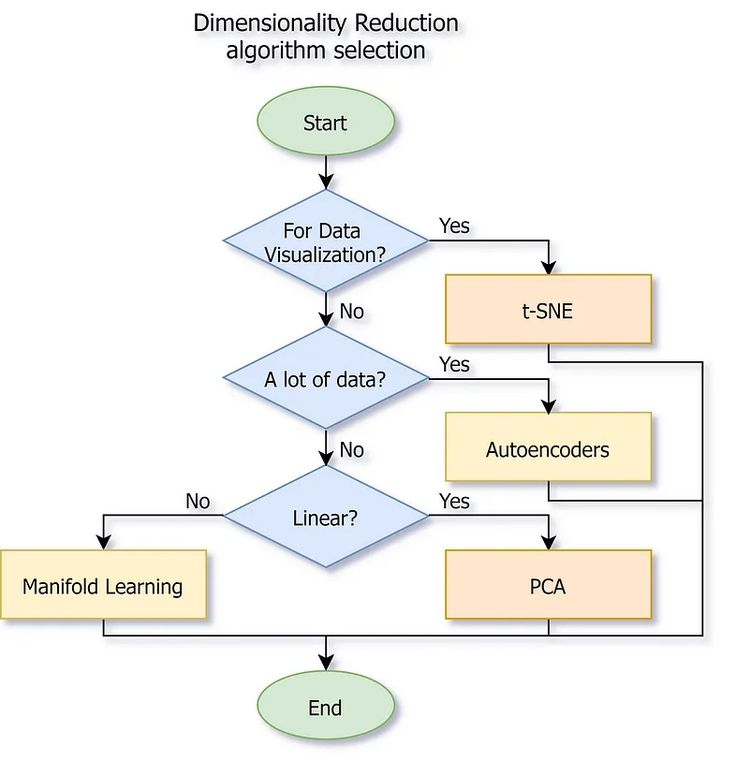

<div class = "alert alert-info">
<h1>The Curse of Dimensionality</h1>


We are so used to living in three dimensions
 that our intuition fails us when we try
to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard to
picture in our minds

</div>


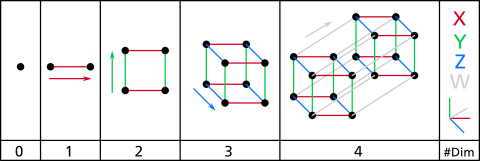


<div class = "alert alert-warning">

Many Machine Learning problems involve thousands or even millions of features for
each training instance. Not only do all these features make training extremely slow,
but they can also make it much harder to find a good solution, as we will see. This
problem is often referred to as the curse of dimensionality.
    
</div>

<div class = "alert alert-danger">

<h1>Dimensionality Reduction</h1>

<ui><li>Reducing dimensionality does cause some information loss (just
like compressing an image to JPEG can degrade its quality), so
even though it will speed up training, it may make your system
perform slightly worse. It also makes your pipelines a bit more
    complex and thus harder to maintain.</li></ui>

<ui><li>So, if training is too slow,
you should first try to train your system with the original data
before considering using dimensionality reduction. In some cases,
reducing the dimensionality of the training data may filter out
some noise and unnecessary details and thus result in higher per‐
formance, but in general it won’t; it will just speed up training.</li></ui>


<ui><li>Apart from speeding up training, dimensionality reduction is also extremely useful
for data visualization (or DataViz). Reducing the number of dimensions down to two
(or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns,
such as clusters</li></ui>
    
</div>

<div class = "alert alert-warning">
<h2>Main Approaches for Dimensionality Reduction</h2>

Before we dive into specific dimensionality reduction algorithms, let’s take a look at
the two main approaches to reducing dimensionality: projection and Manifold
Learning.
</div>

<div class = "alert alert-info">
<h1>Projection</h1>


In most real-world problems, training instances are not spread out uniformly across
all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within (or close
to) a much lower-dimensional subspace of the high-dimensional space. This sounds
very abstract, so let’s look at an example. In you can see a 3D dataset repre‐
sented by circles.


</div>

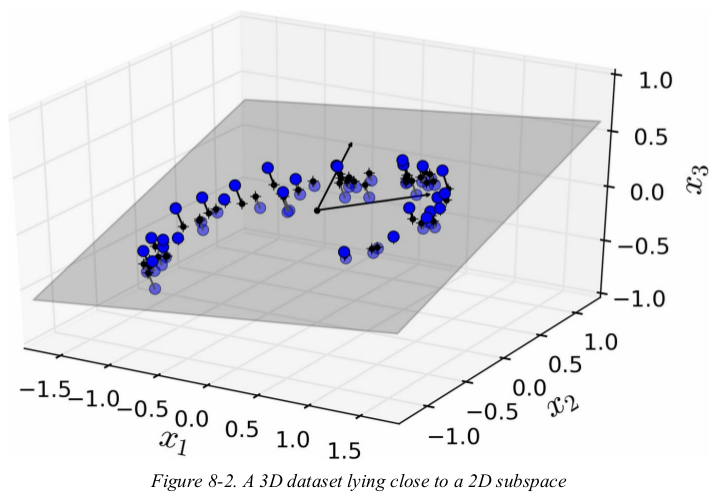

<div class = "alert alert-danger">
    
Notice that all training instances lie close to a plane: this is a lower-dimensional (2D)
subspace of the high-dimensional (3D) space. If we project every training instance
perpendicularly onto this subspace (as represented by the short lines connecting the
instances to the plane), we get the new 2D dataset shown in. Ta-da! We
have just reduced the dataset’s dimensionality from 3D to 2D.

</div>    

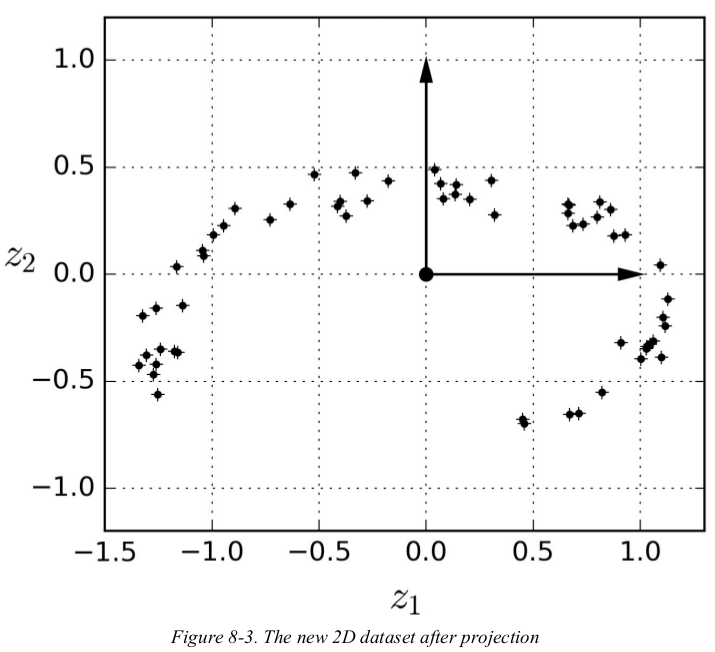

<div class = "alert alert-success">
However, projection is not always the best approach to dimensionality reduction. In
many cases the subspace may twist and turn, such as in the famous Swiss roll toy data‐
set represented
</div>

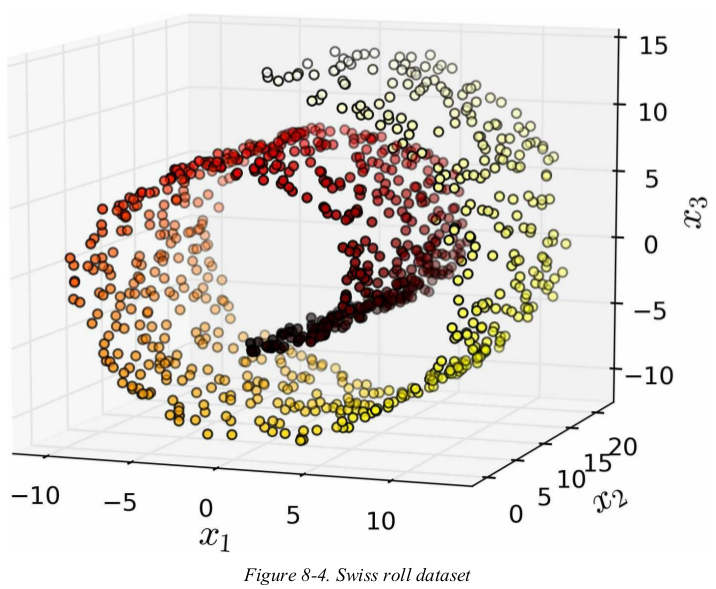

<div class = "alert alert-info">
Simply projecting onto a plane (e.g., by dropping x3
) would squash different layers of
the Swiss roll together, as shown on the left side of. What you really want is
to unroll the Swiss roll to obtain the 2D dataset on the right side
</div>


#### **Squashing by projecting onto a plane (left) versus unrolling the Swiss roll (right)**

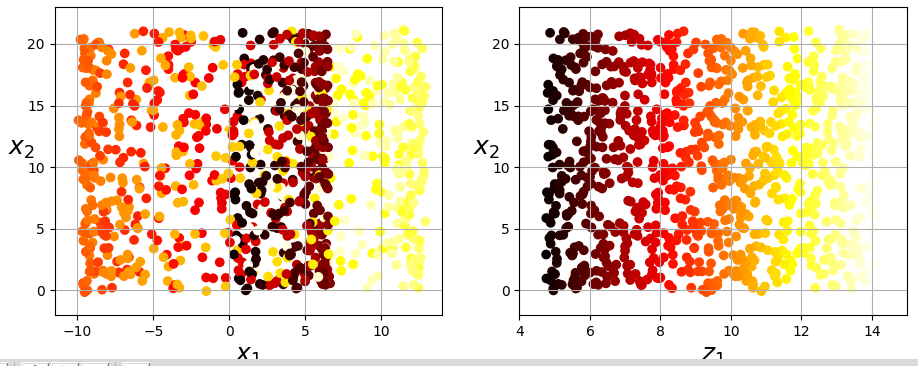



<div class = "alert alert-warning">
    
<h1>Manifold Learning</h1>

The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D
shape that can be bent and twisted in a higher-dimensional space. More generally, a
d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally
resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it
locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algorithms work by modeling the manifold on which
the training instances lie; this is called Manifold Learning. It relies on the manifold
assumption, also called the manifold hypothesis, which holds that most real-world
high-dimensional datasets lie close to a much lower-dimensional manifold. This
assumption is very often empirically observed.                                                                    
</div>

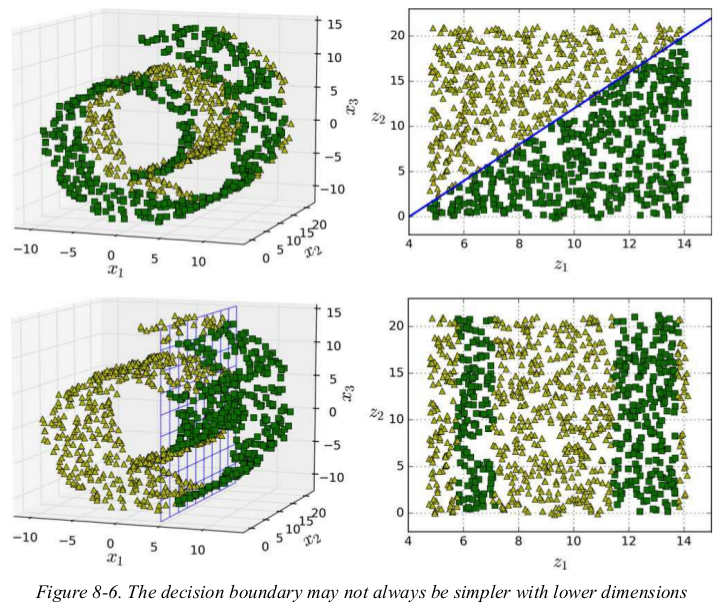


<div class = "alert alert-info">
<h1>PCA</h1>

Principal Component Analysis (PCA) is by far the most popular dimensionality reduc‐
tion algorithm. First it identifies the hyperplane that lies closest to the data, and then
it projects the data onto it

<h2>Preserving the Variance</h2>


Before you can project the training set onto a lower-dimensional hyperplane, you
first need to choose the right hyperplane. For example, a simple 2D dataset is repre‐
sented on the left in , along with three different axes (i.e., 1D hyperplanes).
On the right is the result of the projection of the dataset onto each of these axes. As
you can see, the projection onto the solid line preserves the maximum variance, while
the projection onto the dotted line preserves very little variance and the projection
onto the dashed line preserves an intermediate amount of variance.

</div>


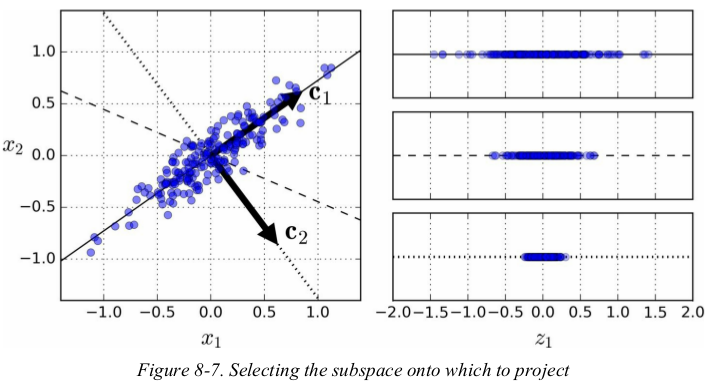

<div class = "alert alert-danger">
It seems reasonable to select the axis that preserves the maximum amount of var‐
iance, as it will most likely lose less information than the other projections
    
</div>

<div class = "alert alert-success">
<h1>Principal Components</h1>


<ui><li>PCA (Principal Component Analysis) identifies the axis that accounts for the largest amount of variance in the training set.</li></ui>
<ui><li>It finds orthogonal axes, called principal components (PCs), that account for the remaining variance in the data.</li></ui>
<ui><li>For higher-dimensional datasets, PCA can find multiple principal components.</li></ui>
<ui><li>Each principal component is represented by a zero-centered unit vector pointing in its direction.</li></ui>
<ui><li>PCA uses Singular Value Decomposition (SVD) to obtain all the principal components.</li></ui>
<ui><li>To project the dataset onto a lower-dimensional hyperplane (reducing dimensionality), the training set is multiplied by a matrix containing the first d principal components (Wd).</li></ui>

    
</div>
    

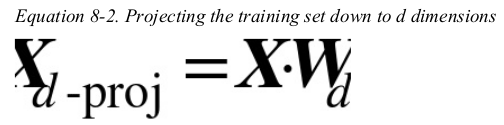



<div class = "alert alert-info">

<ui><li>This projection preserves as much variance as possible in the reduced dataset.</li></ui>



<ui><li>It's important to center the data before applying PCA, but Scikit-Learn's PCA classes take care of this automatically.</li></ui>



<ui><li>The standard matrix factorization technique called Singular Value Decomposition (SVD)
that can decompose the training set matrix X into the matrix multiplication of three
matrices U Σ V⊺
, where V contains the unit vectors that define all the principal com‐
ponents that we are looking for, as shown</li></ui>
    
</div>


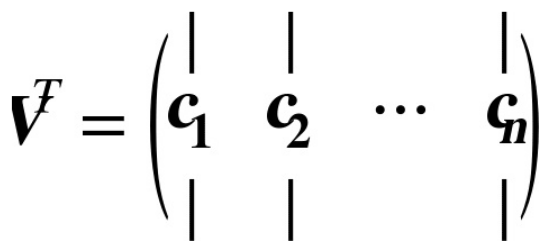

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [4]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [5]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [6]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [7]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)


In [8]:
X2D_using_svd = X2D

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [10]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [12]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:

In [13]:
np.allclose(X2D, -X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [14]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

In [15]:
np.allclose(X3D_inv, X)

False

We can compute the reconstruction error:

In [16]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.01017033779284855

The inverse transform in the SVD approach looks like this:

In [17]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

The reconstructions from both methods are not identical because Scikit-Learn's `PCA` class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:

In [18]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

The `PCA` object gives access to the principal components that it computed:

In [19]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Compare to the first two principal components computed using the SVD method:

In [20]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

Notice how the axes are flipped.

Explained Variance Ratio
Another useful piece of information is the explained variance ratio of each principal
component, available via the explained_variance_ratio_ variable. The ratio indi‐
cates the proportion of the dataset’s variance that lies along each principal compo‐
nent. 

In [21]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This output tells you that 84.2% of the dataset’s variance lies along the first PC, and
14.6% lies along the second PC. This leaves less than 1.2% for the third PC, so it is
reasonable to assume that the third PC probably carries little information.

In [22]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

In [23]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

<div class = "alert alert-info">
<h2>Choosing the Right Number of Dimensions</h2>

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
simpler to choose the number of dimensions that add up to a sufficiently large por‐
tion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for
data visualization—in that case you will want to reduce the dimensionality down to 2
or 3.
    
    
The following code performs PCA without reducing dimensionality, then computes
the minimum number of dimensions required to preserve 95% of the training set’s
variance:
</div>

In [24]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)


In [25]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [27]:
d

154

<div class = "alert alert-warning">

Yet another option is to plot the explained variance as a function of the number of
dimensions (simply plot cumsum; see Figure 8-8). There will usually be an elbow in the
curve, where the explained variance stops growing fast. In this case, you can see that
reducing the dimensionality down to about 100 dimensions wouldn’t lose too much
explained variance.


</div>

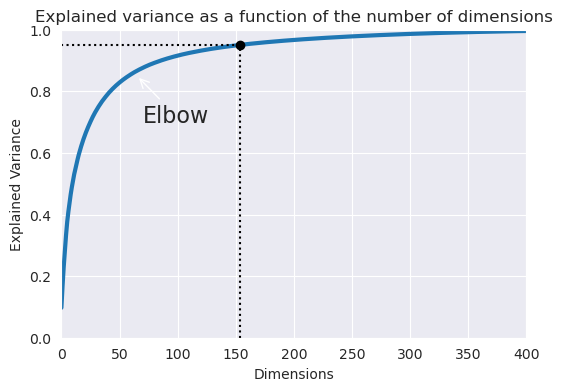

In [30]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.title("Explained variance as a function of the number of dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [31]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [32]:
pca.n_components_

154

In [33]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557436


<div class = "alert alert-danger">
<h1>PCA for Compression</h1>


<ui><li>After dimensionality reduction, the training set takes up much less space. As an
example, try applying PCA to the MNIST dataset while preserving 95% of its var‐
iance. You should find that each instance will have just over 150 features, instead of
    the original 784 features.</li></ui>

<ui><li>It is also possible to decompress the reduced dataset back to 784 dimensions by
applying the inverse transformation of the PCA projection. This won’t give you back
the original data, since the projection lost a bit of information (within the 5% var‐
iance that was dropped), but it will likely be close to the original data. The mean
squared distance between the original data and the reconstructed data (compressed
and then decompressed) is called the reconstruction error.</li></ui>


The following code compresses the MNIST dataset down to 154 dimensions, then
uses the inverse_transform() method to decompress it back to 784 dimensions:


</div>

In [34]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [35]:
X_reduced_pca = X_reduced

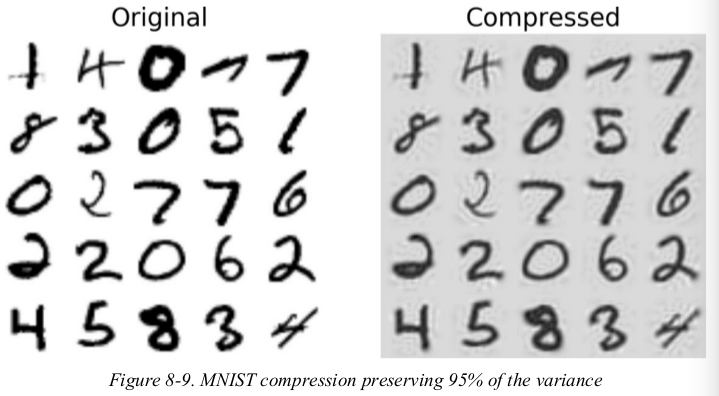

#### **The equation of the inverse transformation is shown**

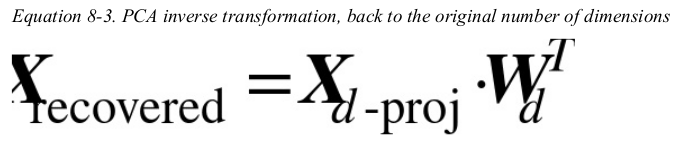

<div class = "alert alert-success">
<h1>Randomized PCA</h1>

If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a sto‐
chastic algorithm called Randomized PCA that quickly finds an approximation of the
first d principal components. Its computational complexity is O(m × d
2
) + O(d
3
),
instead of O(m × n
2
) + O(n
3
) for the full SVD approach, so it is dramatically faster
than full SVD when d is much smaller than n:

</div>

In [36]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

<div class = "alert alert-warning">
By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the
randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m
or n, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full
SVD, you can set the svd_solver hyperparameter to "full".
    
</div>

<div class = "alert alert-info">

<h1>Incremental PCA</h1>

<ui><li>One problem with the preceding implementations of PCA is that they require the
whole training set to fit in memory in order for the algorithm to run. Fortunately,
Incremental PCA (IPCA) algorithms have been developed. They allow you to split the
training set into mini-batches and feed an IPCA algorithm one mini-batch at a time.This is useful for large training sets and for applying PCA online (i.e., on the fly, as
    new instances arrive).</li></ui>


<ui><li>The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s
array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class5
to
reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like
before). Note that you must call the partial_fit() method with each mini-batch,
rather than the fit() method with the whole training set:</li></ui>

</div>

In [37]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [38]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

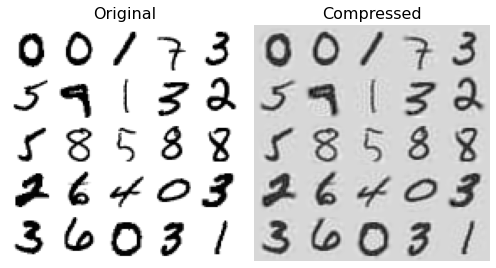

In [40]:
X_reduced_inc_pca = X_reduced

In [41]:
np.allclose(pca.mean_, inc_pca.mean_)

True

In [42]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

In [43]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [44]:
del X_mm

In [45]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

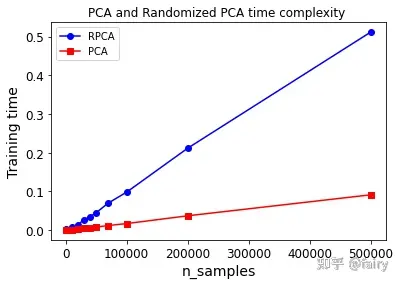

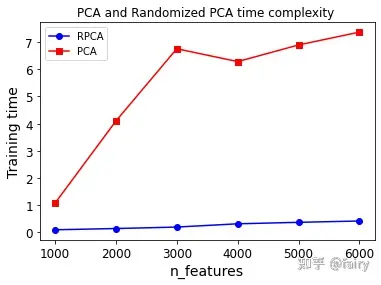

<div class = "alert alert-danger">
<h1>Kernel PCA</h1>


kernel trick, a mathematical technique that implicitly
maps instances into a very high-dimensional space (called the feature space), enabling
nonlinear classification and regression with Support Vector Machines. Recall that a
linear decision boundary in the high-dimensional feature space corresponds to a
complex nonlinear decision boundary in the original space.
It turns out that the same trick can be applied to PCA, making it possible to perform
complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA). It is often good at preserving clusters of instances after projection, or
sometimes even unrolling datasets that lie close to a twisted manifold.


The following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an RBF
kernel
    
</div>


In [47]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [48]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

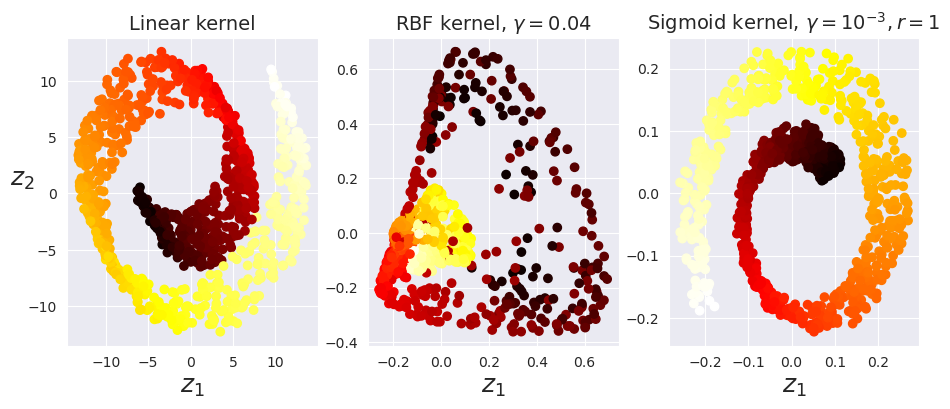

In [51]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

<div class = "alert alert-success">
<h1>Selecting a Kernel and Tuning Hyperparameters</h1>

As kPCA is an unsupervised learning algorithm, there is no obvious performance
measure to help you select the best kernel and hyperparameter values. That said,
dimensionality reduction is often a preparation step for a supervised learning task
(e.g., classification), so you can use grid search to select the kernel and hyperparame‐
ters that lead to the best performance on that task.

</div>

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [53]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [54]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576614

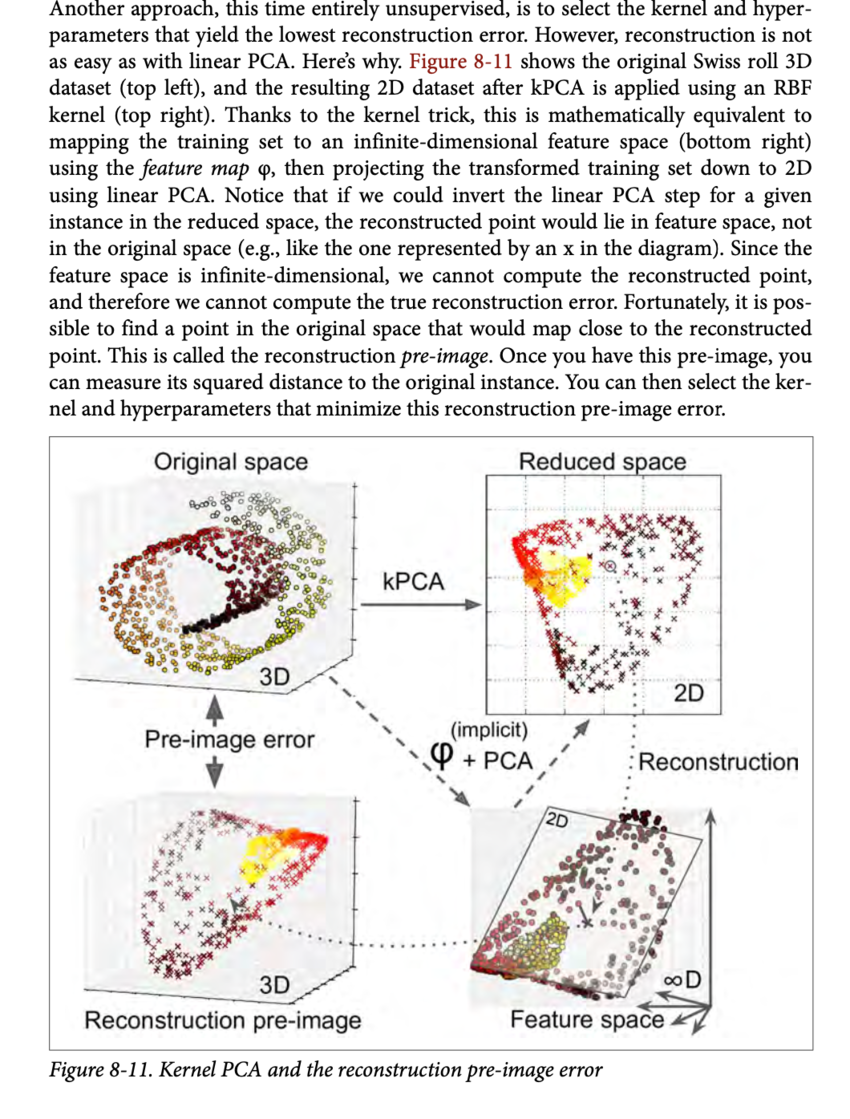


<div class = "alert alert-warning">
<h1>LLE</h1>

Locally Linear Embedding (LLE) is another powerful nonlinear dimensionality reduc‐
tion (NLDR) technique. It is a Manifold Learning technique that does not rely on
projections, like the previous algorithms do. In a nutshell, LLE works by first measur‐
ing how each training instance linearly relates to its closest neighbors (c.n.), and then
looking for a low-dimensional representation of the training set where these local
relationships are best preserved (more details shortly). This approach makes it partic‐
ularly good at unrolling twisted manifolds, especially when there is not too much
noise.


The following code uses Scikit-Learn’s LocallyLinearEmbedding class to unroll the
Swiss roll:


</div>

In [56]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [57]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

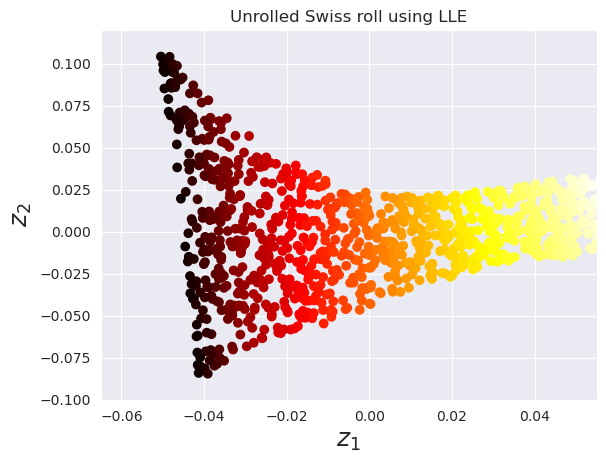

In [58]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.title("Unrolled Swiss roll using LLE")
plt.show()

<div class = "alert alert-info">
<h1>Other Dimensionality Reduction Techniques</h1>

There are many other dimensionality reduction techniques, several of which are
available in Scikit-Learn. Here are some of the most popular ones:

</div>


<div class = "alert alert-warning">

<h2>Random Projections</h2>
    
As its name suggests, projects the data to a lower-dimensional space using a ran‐
dom linear projection. This may sound crazy, but it turns out that such a random
projection is actually very likely to preserve distances well, as was demonstrated
mathematically by William B. Johnson and Joram Lindenstrauss in a famous
lemma. The quality of the dimensionality reduction depends on the number of
instances and the target dimensionality, but surprisingly not on the initial dimen‐
sionality. Check out the documentation for the sklearn.random_projection
package for more details.

</div>


<div class = "alert alert-danger">

<h2>Multidimensional Scaling (MDS)</h2>
    
Reduces dimensionality while trying to preserve the distances between the
instances.

</div>


<div class = "alert alert-success">

<h2>Isomap</h2>
Creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances9 between
the instances.
</div>


<div class = "alert alert-info">

<h2>t-Distributed Stochastic Neighbor Embedding (t-SNE)</h2>
Reduces dimensionality while trying to keep similar instances close and dissimi‐
lar instances apart. It is mostly used for visualization, in particular to visualize
clusters of instances in high-dimensional space (e.g., to visualize the MNIST
images in 2D).

</div>
    
   
   
<div class = "alert alert-warning">
    
<h2>Linear Discriminant Analysis (LDA)</h2>
Is a classification algorithm, but during training it learns the most discriminative
axes between the classes, and these axes can then be used to define a hyperplane
onto which to project the data. The benefit of this approach is that the projection
will keep classes as far apart as possible, so LDA is a good technique to reduce
dimensionality before running another classification algorithm such as an SVM
classifier
    
</div>

In [59]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [60]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [61]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

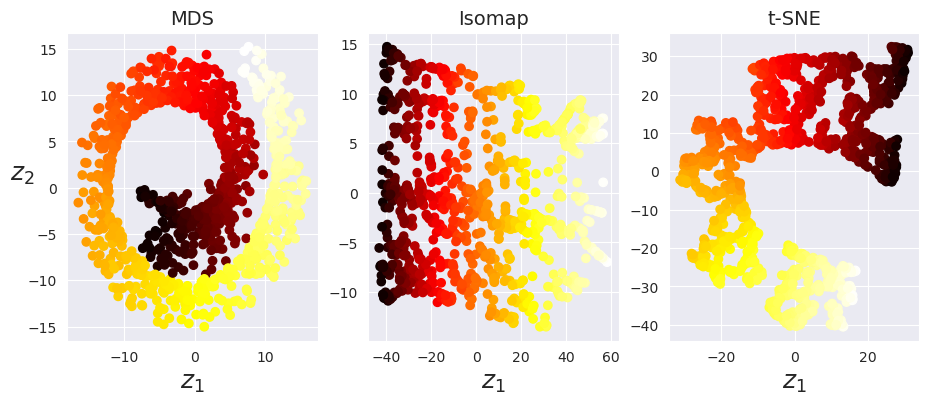

In [67]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
    
plt.show()